## CPE 4903 HW - Gradient Descent - 2nd Order Polynomial ##
Complete the code by addressing the 5 tasks describe througout the file. 
You should have the files HW "wk4 second order LR-Gradient HW.ipnb" and "HW_wk4.gradient.csv' in your working directory. Work off the .ipnb and submit that file for your assignment.

<div>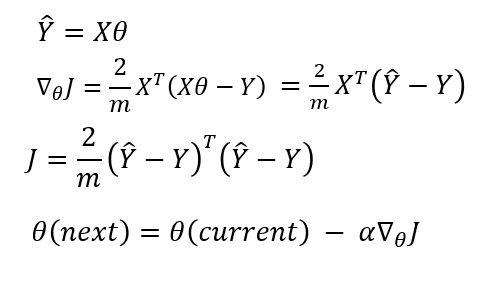<div>



In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Task 1: Load 'HW_wk4_gradient.csv' and create vectors x and y ##
Here is what your dataframe looks like:
<div>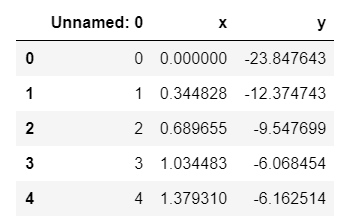<div>
Make sure that x.shape and y.shape is (m,1)

In [41]:
# your code here
# load csv file and extract vectors x and y
gradient = pd.read_csv('HW_wk4_gradient (1).csv') # read the csv file
gradient=gradient.drop(['Unnamed: 0'],axis=1)     # get rid of the first column that's kinda useless
gradient.head()                                   # show the first five rows

,x,y
0,0.000000,-23.847643
1,0.344828,-12.374743
2,0.689655,-9.547699
3,1.034483,-6.068454
4,1.379310,-6.162514


In [42]:
x = np.array(gradient['x']) # vectorize the x column
y = np.array(gradient['y']) # vectorize the y column

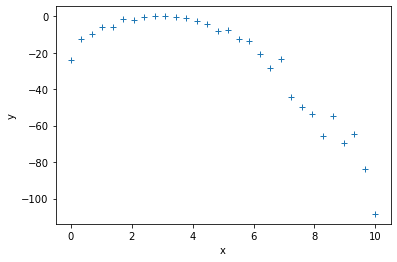

In [43]:
plt.plot(x,y,'+');
plt.xlabel('x');
plt.ylabel('y');

Scatter plot of x and y should look like this:

<div>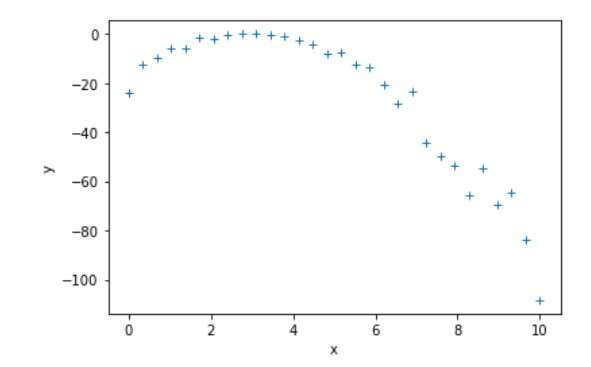<div>

In [44]:
m = len(x)
ones = np.ones((m,1))
x = x.reshape((m,1))
y = y.reshape((m,1))

In [45]:
# This section creates the feature matrix X and Target vector Y
X = np.block([ones, x, x**2]) #useful block command to construct bigger matrix consisting of smaller ones
Y = y
theta = np.zeros((3,1))

In [46]:
X

array([[  1.        ,   0.        ,   0.        ],
       [  1.        ,   0.34482759,   0.11890606],
       [  1.        ,   0.68965517,   0.47562426],
       [  1.        ,   1.03448276,   1.07015458],
       [  1.        ,   1.37931034,   1.90249703],
       [  1.        ,   1.72413793,   2.97265161],
       [  1.        ,   2.06896552,   4.28061831],
       [  1.        ,   2.4137931 ,   5.82639715],
       [  1.        ,   2.75862069,   7.60998811],
       [  1.        ,   3.10344828,   9.6313912 ],
       [  1.        ,   3.44827586,  11.89060642],
       [  1.        ,   3.79310345,  14.38763377],
       [  1.        ,   4.13793103,  17.12247325],
       [  1.        ,   4.48275862,  20.09512485],
       [  1.        ,   4.82758621,  23.30558859],
       [  1.        ,   5.17241379,  26.75386445],
       [  1.        ,   5.51724138,  30.43995244],
       [  1.        ,   5.86206897,  34.36385256],
       [  1.        ,   6.20689655,  38.5255648 ],
       [  1.        ,   6.55172

## Task 2 - Add gradient algorithm code ##

In [47]:
epoch = 5000
#theta = np.random.randn(2,1)
theta = np.zeros((3,1))
alpha = .0003

In [48]:
J = np.zeros((epoch,1))
for i in range(epoch):
    yhat = np.dot(X, theta)
    yerr = yhat - Y
    J[i,0] = np.dot(yerr.T, yerr)/m
    deltaJ = np.dot(X.T, yerr) * 2/m
    theta = theta - alpha*deltaJ
print(theta)

[[-3.9003519 ]
 [ 6.04541624]
 [-1.49600838]]


Text(0.5, 0, 'Iteration')

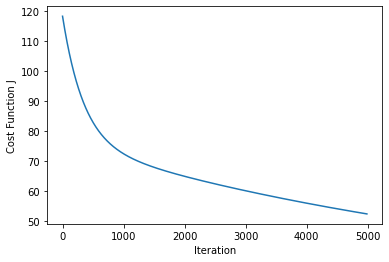

In [49]:
plt.plot(J[10:-1]); # avoid seeing initial spike that causes "zoom out" effect
plt.ylabel('Cost Function J')
plt.xlabel('Iteration')

## Task 3 - Produce results for alpha = .003 and epoch = 5000 ##
With alpha = .0003 and epoch = 5000, copy/paste the plot of the fit that looks like one below:
<div>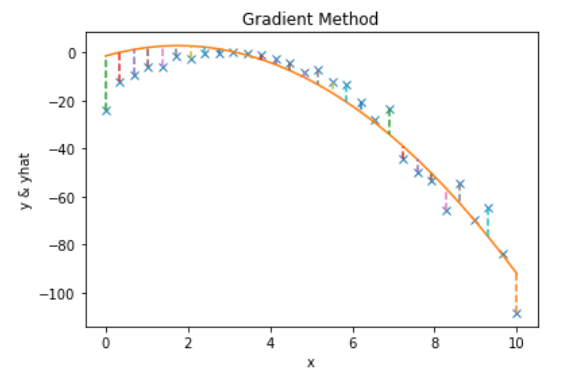<div>

The MSE of gradient converges to 52.420
The fitted equation is y = -3.900 + 6.045x + -1.496x**2


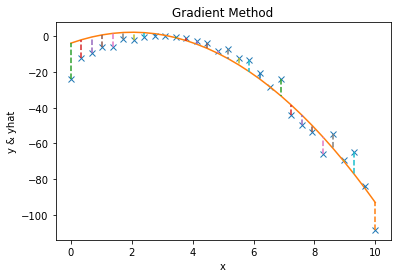

In [50]:
print (f'The MSE of gradient converges to {J[-1,0]:.3f}')
theta0 = theta[0,0]
theta1 = theta[1,0]
theta2 = theta[2,0]
plt.plot(x, y, 'x')
yhat = theta0 + theta1*x + theta2*x**2
plt.plot(x,yhat )
for i in range(m):
    plt.plot([x[i], x[i]], [y[i], yhat[i]], '--')
plt.title('Gradient Method')
plt.ylabel('y & yhat')
plt.xlabel('x')
print(f'The fitted equation is y = {theta0:.3f} + {theta1:.3f}x + {theta2:.3f}x**2')

## Task 4 - With alpha = .0003, determine the epoch size where the MSE has converged ('plateau') ##
Paste plots of J and fit (y&yhat vs x) in this cell:
 

In [51]:
epoch = 100000

[[-18.14966685]
 [ 11.95568062]
 [ -1.99291383]]


Text(0.5, 0, 'Iteration')

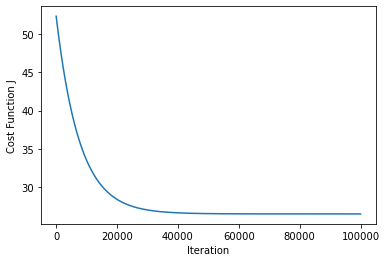

In [52]:
J = np.zeros((epoch,1))
for i in range(epoch):
    yhat = np.dot(X, theta)
    yerr = yhat - Y
    J[i,0] = np.dot(yerr.T, yerr)/m
    deltaJ = np.dot(X.T, yerr) * 2/m
    theta = theta - alpha*deltaJ
print(theta)
plt.plot(J[10:-1]); # avoid seeing initial spike that causes "zoom out" effect
plt.ylabel('Cost Function J')
plt.xlabel('Iteration')

The MSE of gradient converges to 26.434
The fitted equation is y = -18.150 + 11.956x + -1.993x**2


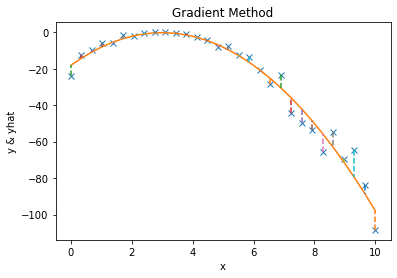

In [53]:
print (f'The MSE of gradient converges to {J[-1,0]:.3f}')
theta0 = theta[0,0]
theta1 = theta[1,0]
theta2 = theta[2,0]
plt.plot(x, y, 'x')
yhat = theta0 + theta1*x + theta2*x**2
plt.plot(x,yhat )
for i in range(m):
    plt.plot([x[i], x[i]], [y[i], yhat[i]], '--')
plt.title('Gradient Method')
plt.ylabel('y & yhat')
plt.xlabel('x')
print(f'The fitted equation is y = {theta0:.3f} + {theta1:.3f}x + {theta2:.3f}x**2')

## Task 5 - What is the max alpha before divergence kicks in? ##
* max alpha = ?
* How many iterations required to converge? Paste both J and fit plots here.
* What is the MSE?

In [54]:
epoch = 100000
alpha = 0.000465

[[-18.17058347]
 [ 11.96435175]
 [ -1.99364268]]


Text(0.5, 0, 'Iteration')

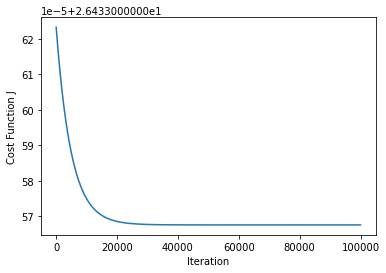

In [55]:
J = np.zeros((epoch,1))
for i in range(epoch):
    yhat = np.dot(X, theta)
    yerr = yhat - Y
    J[i,0] = np.dot(yerr.T, yerr)/m
    deltaJ = np.dot(X.T, yerr) * 2/m
    theta = theta - alpha*deltaJ
print(theta)
plt.plot(J[10:-1]); # avoid seeing initial spike that causes "zoom out" effect
plt.ylabel('Cost Function J')
plt.xlabel('Iteration')

The MSE of gradient converges to 26.434
The fitted equation is y = -18.171 + 11.964x + -1.994x**2


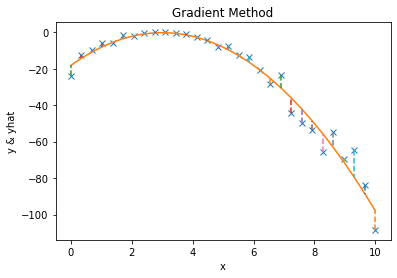

In [56]:
print (f'The MSE of gradient converges to {J[-1,0]:.3f}')
theta0 = theta[0,0]
theta1 = theta[1,0]
theta2 = theta[2,0]
plt.plot(x, y, 'x')
yhat = theta0 + theta1*x + theta2*x**2
plt.plot(x,yhat )
for i in range(m):
    plt.plot([x[i], x[i]], [y[i], yhat[i]], '--')
plt.title('Gradient Method')
plt.ylabel('y & yhat')
plt.xlabel('x')
print(f'The fitted equation is y = {theta0:.3f} + {theta1:.3f}x + {theta2:.3f}x**2')

## Task 6 - To improve convergence rate, we can scale (standardize) the inputs ##
Below is the scatter plot of x before scaling. Create X_scaled, for every column (except the first as it is already scaled) such that xi = (xi - mean(xi))/std(xi)
<div>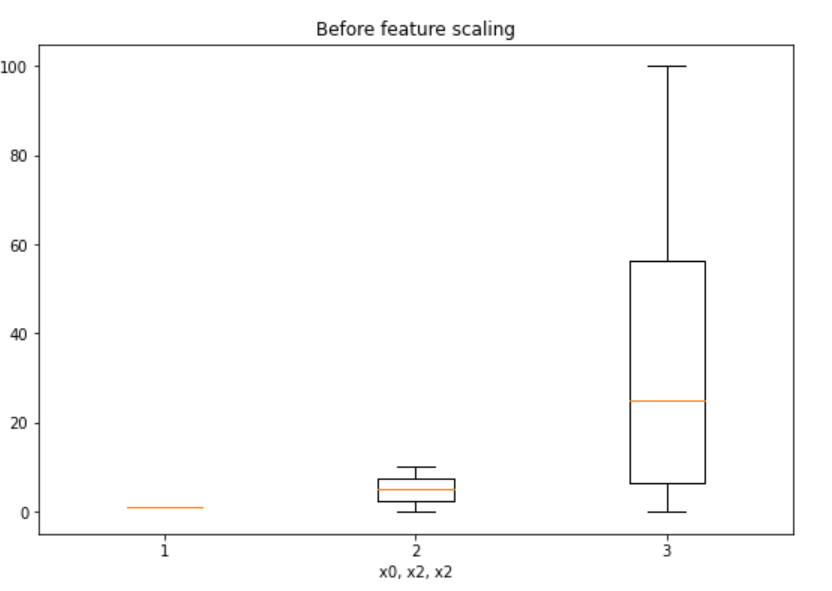<div>

Text(0.5, 1.0, 'Before feature scaling')

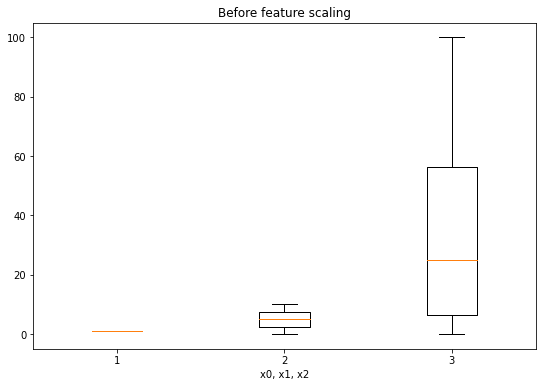

In [59]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(X)
plt.xlabel('x0, x1, x2')
plt.title('Before feature scaling');

In [62]:
X_mean = np.mean(X, axis=0) #mean of columns
mu1 = X_mean[1]
mu2 = X_mean[2]
X_var = np.var(X, axis=0)
s1 = np.sqrt(X_var[1])
s2 = np.sqrt(X_var[2])
X_scaled = X # initialize

In [71]:
# your code here to calculate X_scaled using mu1, mu2, s1, s2. Avoid using for loop and use vector operations
# outputs: updated X_scaled
np.shape(X_scaled)
X_scaled[:,1] = (X[:,1] - mu1)/s1
X_scaled[:,2] = (X[:,2] - mu2)/s2
print(X_scaled)

[[ 1.         -1.67524673 -1.09777015]
 [ 1.         -1.55971247 -1.09392058]
 [ 1.         -1.44417822 -1.08237186]
 [ 1.         -1.32864396 -1.06312399]
 [ 1.         -1.2131097  -1.03617697]
 [ 1.         -1.09757545 -1.00153081]
 [ 1.         -0.98204119 -0.95918549]
 [ 1.         -0.86650693 -0.90914103]
 [ 1.         -0.75097267 -0.85139742]
 [ 1.         -0.63543842 -0.78595467]
 [ 1.         -0.51990416 -0.71281276]
 [ 1.         -0.4043699  -0.63197171]
 [ 1.         -0.28883564 -0.54343151]
 [ 1.         -0.17330139 -0.44719217]
 [ 1.         -0.05776713 -0.34325367]
 [ 1.          0.05776713 -0.23161603]
 [ 1.          0.17330139 -0.11227924]
 [ 1.          0.28883564  0.0147567 ]
 [ 1.          0.4043699   0.14949179]
 [ 1.          0.51990416  0.29192602]
 [ 1.          0.63543842  0.4420594 ]
 [ 1.          0.75097267  0.59989193]
 [ 1.          0.86650693  0.76542361]
 [ 1.          0.98204119  0.93865443]
 [ 1.          1.09757545  1.11958441]
 [ 1.          1.2131097 

Text(0.5, 1.0, 'After feature scaling')

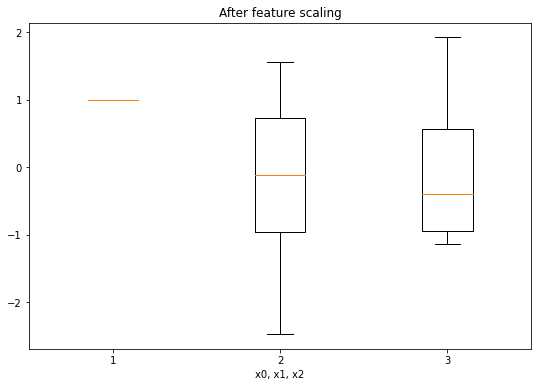

In [72]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(X_scaled)
plt.xlabel('x0, x1, x2')
plt.title('After feature scaling')

Show that your output looks like this:
<div>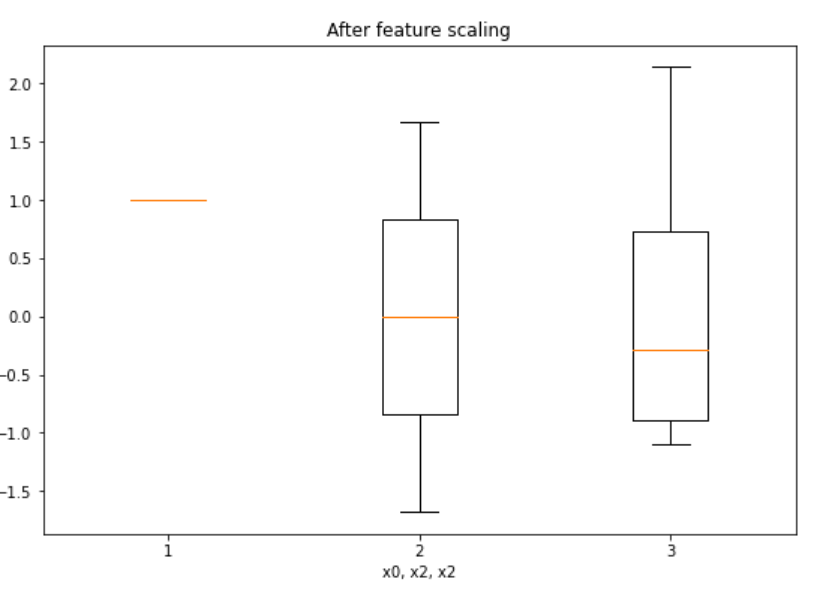<div>
